In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
print(cv2.__version__)

4.2.0


In [ ]:
img =  cv2.imread('./generated_train/285044.jpeg', cv2.IMREAD_COLOR)
img.shape
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
df = pd.read_csv("testset.csv")
df.tail()

,Data,Label
9595,285044.jpeg,4
9596,383736.jpeg,4
9597,771886.jpeg,4
9598,298185.jpeg,4
9599,430460.jpeg,4


In [3]:
df['Label'].value_counts()
len(df)

9600

In [2]:

img =  cv2.imread('./test_folder/testset/100037.jpeg', cv2.IMREAD_COLOR)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
pixel = img[100, 100]
print(pixel)

[252 237 204]


In [12]:
type(img)

NoneType

In [7]:
# import cv2
# img =  cv2.imread('demo-hand-written.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh_inv = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# Blur the image
blur = cv2.GaussianBlur(thresh_inv,(1,1),0)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# find contours
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

mask = np.ones(img.shape[:2], dtype="uint8") * 255
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w*h>1000:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)

res_final = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

cv2.imshow("boxes", mask)
cv2.imshow("final image", res_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img.shape

(618, 425, 3)

In [44]:
# [200, 30, 30], [255, 90, 90])
lower_red = np.array([0,0,150], dtype = 'uint8')  # BGR-code of your lowest red
upper_red = np.array([39,3,255], dtype = 'uint8')   # BGR-code of your highest red 
mask = cv2.inRange(img, lower_red, upper_red) 
print(mask)
#get all non zero values
coord=cv2.findNonZero(mask)
print(coord)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
None


In [40]:
color = (0,0,255)
np.where(img ==color)

(array([  0,   0,   0, ..., 617, 617, 617]),
 array([  0,   1,   2, ..., 422, 423, 424]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [29]:

import cv2 
import numpy as np 
  
# Let's load a simple image with 3 black squares 
image = cv2.imread('./test_folder/testset/100037.jpeg') 
# cv2.waitKey(0) 
cv2.imshow('Original', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
  
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
# print(edged.shape)
# print(image[:,:].shape)
img2 = np.zeros_like(image)
img2[:,:,0] = edged
img2[:,:,1] = edged
img2[:,:,2] = edged
print(img2.shape)
print("original:", image.shape)
print(type(image))
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# img2 = cv2.bitwise_not(img2)
cv2.imshow('Canny Edges After Contouring', img2) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 
print("Number of Contours found = " + str(len(contours))) 
  
    
cnts = imutils.grab_contours(contours)
cnts1 = cnts[0]

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 
# img1_bg = cv2.bitwise_and(image,edged)
img1_bg = np.multiply(image, img2)
cv2.imshow('Contour', img1_bg) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


(618, 425, 3)
original: (618, 425, 3)
<class 'numpy.ndarray'>
Number of Contours found = 1467


Exception: Contours tuple must have length 2 or 3, otherwise OpenCV changed their cv2.findContours return signature yet again. Refer to OpenCV's documentation in that case

In [7]:
import pandas as pd
import numpy as np
import cv2
import os
import imutils
df = pd.read_csv("test_folder/testset.csv")
# for x in df.tail(1)["Data"]:
#     a = os.path.join('./testset', x)
#     img = cv2.imread(a)
#     cv2.imshow('image', img)
#     cv2.waitKey(0) 
#     cv2.destroyAllWindows()

#     image_path = os.path.join('./generated_train',x)
#     print(image_path)

#     cv2.imwrite(image_path, img) 
    


In [17]:
df.loc[df['Label']!=0]

,Data,Label
0,600795.jpeg,10
1,627152.jpeg,10
2,119963.jpeg,10
3,118264.jpeg,10
4,199420.jpeg,10
...,...,...
9595,285044.jpeg,4
9596,383736.jpeg,4
9597,771886.jpeg,4
9598,298185.jpeg,4


In [12]:
len(df)

9600

In [10]:
#experiment
import os
import cv2
mask3 = cv2.imread(os.path.join('./generated_train','285044.jpeg' ))
print(type(mask3))
df = pd.read_csv("testset.csv")
for a in df.loc[df['Label']==0]['Data']:
    img = cv2.imread(os.path.join('./generated_train', a))
    mask3 = cv2.bitwise_or(img, mask3, mask = None) 
#     mask3 = cv2.add(img, mask3) 

#     print(mask3.shape)
cv2.imshow('image', mask3)
cv2.waitKey(0) 
cv2.destroyAllWindows()    
   

<class 'numpy.ndarray'>


In [11]:
cv2.imwrite("invalidclusterfile.jpeg", mask3)

True

In [12]:
gray = cv2.cvtColor(mask3, cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# img2 = cv2.bitwise_not(img2)
cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 
print("Number of Contours found = " + str(len(contours))) 
  
    
cnts = imutils.grab_contours(contours)
cnts1 = cnts[0]

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

Number of Contours found = 1620


Exception: Contours tuple must have length 2 or 3, otherwise OpenCV changed their cv2.findContours return signature yet again. Refer to OpenCV's documentation in that case

In [36]:
print("hello")

hello


In [9]:
df['Label'].unique()

array([10, 45,  3, 23, 37, 34, 16,  5, 36, 26, 47, 27,  6, 28, 22,  1, 31,
       43,  0, 35, 20, 33, 18, 39, 32, 21, 12, 42, 11, 29, 40, 24, 14,  8,
        7, 38, 46, 17, 30, 41, 44, 25,  2, 19, 13,  9, 15,  4])

Generate new data based on the presence of red color

In [15]:
import pandas as pd
import numpy as np
import cv2
import os
import imutils
df = pd.read_csv("test_folder/testset.csv")
def take_input(image):
    img = cv2.imread(os.path.join('./test_folder/testset', image))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_range = np.array([0, 70, 50])
    upper_range = np.array([10, 255, 255])

    mask1 = cv2.inRange(hsv, lower_range, upper_range)
    lower_range = np.array([170, 70, 50])
    upper_range = np.array([100, 255, 255])

    mask2 = cv2.inRange(hsv, lower_range, upper_range)
    mask3 = cv2.bitwise_or(mask1, mask2, mask = None) 
    return img, mask3
    #     image_path = os.path.join('./generated_test',a)
    #     cv2.imwrite(image_path, mask3)
    

Let's project these points

In [42]:

import cv2
import numpy as np
import imutils
img = cv2.imread('./test_folder/testset/100262.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_range = np.array([0, 70, 50])
upper_range = np.array([10, 255, 255])

mask1 = cv2.inRange(hsv, lower_range, upper_range)
lower_range = np.array([170, 70, 50])
upper_range = np.array([100, 255, 255])

mask2 = cv2.inRange(hsv, lower_range, upper_range)
cv2.imshow('image', img)
cv2.imshow('mask', mask1)
cv2.imshow('mask2', mask2)
mask3 = cv2.bitwise_or(mask1, mask2, mask = None) 
# mask3 = np.logical_or(mask, mask2)
cv2.imshow('mask3', mask3)
print(mask3.shape)

# print("mask")
# if ((mask==0)|(mask ==1)).all():
#     print("True")
# else:
#     print("false")
    
# print(mask)

while(True):
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

(618, 425)


In [3]:
for a in df.head(35)['Data']:
    img = cv2.imread(os.path.join('./testset', a))
    print(img.shape)

(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)
(618, 425, 3)


In [41]:
cv2.imshow('Thres', img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [34]:
blurred = cv2.GaussianBlur(x, (11, 11), 0)
cv2.imshow('Contours', blurred) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)[1]
cv2.imshow('Thres', thresh) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [36]:
# gray = cv2.cvtColor(mask3, cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(x, 30, 200) 
cv2.waitKey(0) 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# img2 = cv2.bitwise_not(img2)
cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [39]:
m = x

Coordinate mapping

127,101

214,101

299,101

17,139

17,181

17, 215

14,247

14,283

13,319

13,357

13,389

15,426

16,463

20,501


In [13]:
# test_img = x


def predict(test_img, threshold=100):
    count_threshold = 0
    label = 0
    count = np.count_nonzero(test_img[95:139,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 1
    count = np.count_nonzero(test_img[139:181, 17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 2

    count = np.count_nonzero(test_img[181:215,17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 3
    count = np.count_nonzero(test_img[215:247,17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 4
    count = np.count_nonzero(test_img[247:283,17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 5
    count =  np.count_nonzero(test_img[283:319,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 6
    count =  np.count_nonzero(test_img[319:375,17:127]>threshold) 
    if count > count_threshold:
        count_threshold = count
        label = 7
    count =  np.count_nonzero(test_img[360:395,17:127]>threshold) 
    if count > count_threshold:
        count_threshold = count
        label = 8
    count =  np.count_nonzero(test_img[395:426,17:127]>threshold) 
    if count > count_threshold:
        count_threshold = count
        label = 9
    count =  np.count_nonzero(test_img[426:463,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 10
    count =  np.count_nonzero(test_img[463:501,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 11
    count =  np.count_nonzero(test_img[501:542,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 12
    count =  np.count_nonzero(test_img[95:139,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 13
    count =  np.count_nonzero(test_img[139:181,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 14
    count =  np.count_nonzero(test_img[181:215, 127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 15
    count =  np.count_nonzero(test_img[215:247, 127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 16
    count =  np.count_nonzero(test_img[247:283, 127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 17
    count =  np.count_nonzero(test_img[283:319,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 18
    count =  np.count_nonzero(test_img[319:360,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 19
    count =  np.count_nonzero(test_img[360:395,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 20
    count =  np.count_nonzero(test_img[395:426,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 21
    count =  np.count_nonzero(test_img[426:463,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 22
    count =  np.count_nonzero(test_img[463:501,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 23
    count =  np.count_nonzero(test_img[501:542,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 24
    count =  np.count_nonzero(test_img[95:139,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 25
    count =  np.count_nonzero(test_img[139:181,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 26
    count =  np.count_nonzero(test_img[181:215,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 27
    count =  np.count_nonzero(test_img[215:247,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 28
    count =  np.count_nonzero(test_img[247:283,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 29
    count =  np.count_nonzero(test_img[283:319,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 30
    count =  np.count_nonzero(test_img[319:360,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 31
    count =  np.count_nonzero(test_img[360:395,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 32
    count =  np.count_nonzero(test_img[395:426,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 33
    count =  np.count_nonzero(test_img[426:463,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 34
    count =  np.count_nonzero(test_img[463:501,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 35
    count = np.count_nonzero(test_img[501:542,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 36
    count = np.count_nonzero(test_img[95:139,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 37
    count = np.count_nonzero(test_img[139:181,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 38
    count =np.count_nonzero(test_img[181:215,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 39
    count = np.count_nonzero(test_img[215:247,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 40
    count = np.count_nonzero(test_img[247:283,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 41
    count = np.count_nonzero(test_img[283:319,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 42
    count = np.count_nonzero(test_img[319:360,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 43
    count = np.count_nonzero(test_img[360:395,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 44
    count = np.count_nonzero(test_img[395:426,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 45
    count = np.count_nonzero(test_img[426:463,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 46
    count = np.count_nonzero(test_img[463:501,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 47
    return label    


In [132]:
df.head(100)

,Data,Label
0,632755.jpeg,10
1,496855.jpeg,10
2,155390.jpeg,10
3,265013.jpeg,10
4,496360.jpeg,10
...,...,...
95,728422.jpeg,45
96,867837.jpeg,45
97,258941.jpeg,45
98,274666.jpeg,45


In [135]:
def display(img, mask):
    cv2.imshow('Original', img) 
    cv2.imshow('Star', mask[:,:]) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 

In [120]:
img, mask=take_input('274666.jpeg')
predict(mask[:,:])

45

In [137]:
img, mask=take_input('274666.jpeg')
predict(mask[:,:])
display(img, mask)


KeyboardInterrupt: 

In [16]:
df = pd.read_csv('test_folder/testset.csv')

listt = []
for imgg in df['Data']:
    img, mask = take_input(imgg)
    x = predict(mask[:,:])
    listt.append(x)

df2= df.copy()
df2['Predicted']=listt

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(df2['Label'].values, df2['Predicted'].values))
print(confusion_matrix(df2['Label'].values, df2['Predicted'].values))

              precision    recall  f1-score   support

           0       0.03      0.37      0.05        30
           1       0.93      0.79      0.85        33
           2       1.00      0.88      0.93        16
           3       1.00      0.92      0.96        13
           4       0.98      0.79      0.87        56
           5       0.86      1.00      0.92         6
           6       0.96      0.87      0.91        30
           7       0.75      0.87      0.81        63
           8       1.00      0.49      0.66        45
           9       1.00      0.82      0.90        68
          10       0.84      0.89      0.86        18
          11       0.99      0.90      0.94        94
          12       1.00      0.85      0.92        88
          13       1.00      0.88      0.94        92
          14       1.00      0.86      0.92        14
          15       1.00      0.86      0.92        50
          16       1.00      0.78      0.88        59
          17       0.92    

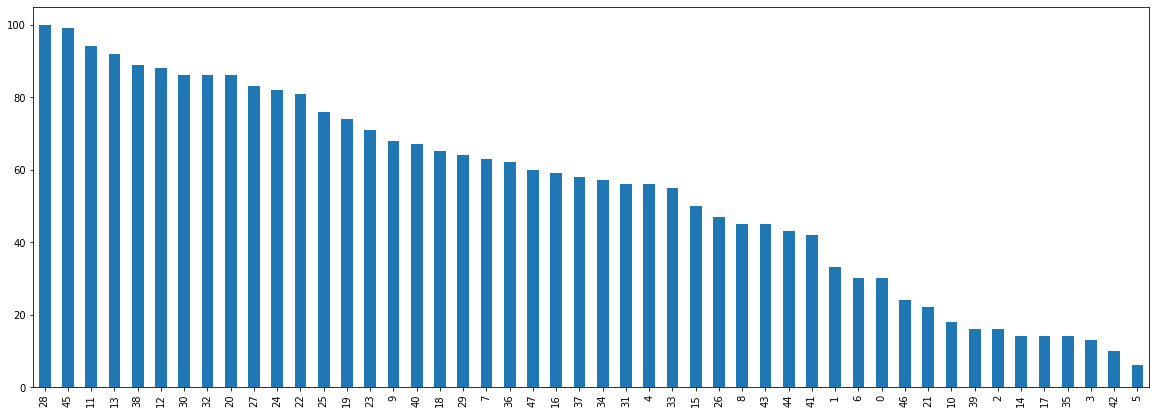

In [18]:
import pandas as pd
# df1 = pd.read_csv('testset.csv')
import matplotlib.pyplot as plt
plt.figure(figsize =(20, 7))
df['Label'].value_counts().plot(kind = 'bar')

In [7]:
df1.loc[df1['Label']==0]

,Data,Label
3600,525230.jpeg,0
3601,281668.jpeg,0
3602,183565.jpeg,0
3603,607250.jpeg,0
3604,629213.jpeg,0
...,...,...
3795,587975.jpeg,0
3796,420732.jpeg,0
3797,271342.jpeg,0
3798,427837.jpeg,0


In [19]:
import pandas as pd
import numpy as np
import cv2
import os
import imutils
df = pd.read_csv("test_folder/testset.csv")
def take_input(image):
    img = cv2.imread(os.path.join('./test_folder/testset', image))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_range = np.array([0, 70, 50])
    upper_range = np.array([10, 255, 255])

    mask1 = cv2.inRange(hsv, lower_range, upper_range)
    lower_range = np.array([170, 70, 50])
    upper_range = np.array([100, 255, 255])

    mask2 = cv2.inRange(hsv, lower_range, upper_range)
    mask3 = cv2.bitwise_or(mask1, mask2, mask = None) 
    return img, mask3

In [20]:
# test_img = x


def predict(test_img, threshold=100):
    count_threshold = 0
    label = 0
    count = np.count_nonzero(test_img[95:139,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 1
    count = np.count_nonzero(test_img[139:181, 17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 2

    count = np.count_nonzero(test_img[181:215,17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 3
    count = np.count_nonzero(test_img[215:247,17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 4
    count = np.count_nonzero(test_img[247:283,17:127]>threshold)    
    if count > count_threshold:
        count_threshold = count
        label = 5
    count =  np.count_nonzero(test_img[283:319,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 6
    count =  np.count_nonzero(test_img[319:375,17:127]>threshold) 
    if count > count_threshold:
        count_threshold = count
        label = 7
    count =  np.count_nonzero(test_img[360:395,17:127]>threshold) 
    if count > count_threshold:
        count_threshold = count
        label = 8
    count =  np.count_nonzero(test_img[395:426,17:127]>threshold) 
    if count > count_threshold:
        count_threshold = count
        label = 9
    count =  np.count_nonzero(test_img[426:463,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 10
    count =  np.count_nonzero(test_img[463:501,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 11
    count =  np.count_nonzero(test_img[501:542,17:127]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 12
    count =  np.count_nonzero(test_img[95:139,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 13
    count =  np.count_nonzero(test_img[139:181,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 14
    count =  np.count_nonzero(test_img[181:215, 127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 15
    count =  np.count_nonzero(test_img[215:247, 127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 16
    count =  np.count_nonzero(test_img[247:283, 127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 17
    count =  np.count_nonzero(test_img[283:319,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 18
    count =  np.count_nonzero(test_img[319:360,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 19
    count =  np.count_nonzero(test_img[360:395,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 20
    count =  np.count_nonzero(test_img[395:426,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 21
    count =  np.count_nonzero(test_img[426:463,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 22
    count =  np.count_nonzero(test_img[463:501,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 23
    count =  np.count_nonzero(test_img[501:542,127:214]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 24
    count =  np.count_nonzero(test_img[95:139,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 25
    count =  np.count_nonzero(test_img[139:181,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 26
    count =  np.count_nonzero(test_img[181:215,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 27
    count =  np.count_nonzero(test_img[215:247,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 28
    count =  np.count_nonzero(test_img[247:283,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 29
    count =  np.count_nonzero(test_img[283:319,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 30
    count =  np.count_nonzero(test_img[319:360,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 31
    count =  np.count_nonzero(test_img[360:395,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 32
    count =  np.count_nonzero(test_img[395:426,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 33
    count =  np.count_nonzero(test_img[426:463,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 34
    count =  np.count_nonzero(test_img[463:501,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 35
    count = np.count_nonzero(test_img[501:542,214:300]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 36
    count = np.count_nonzero(test_img[95:139,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 37
    count = np.count_nonzero(test_img[139:181,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 38
    count =np.count_nonzero(test_img[181:215,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 39
    count = np.count_nonzero(test_img[215:247,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 40
    count = np.count_nonzero(test_img[247:283,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 41
    count = np.count_nonzero(test_img[283:319,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 42
    count = np.count_nonzero(test_img[319:360,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 43
    count = np.count_nonzero(test_img[360:395,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 44
    count = np.count_nonzero(test_img[395:426,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 45
    count = np.count_nonzero(test_img[426:463,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 46
    count = np.count_nonzero(test_img[463:501,300:400]>threshold)
    if count > count_threshold:
        count_threshold = count
        label = 47
    return label    


In [21]:
def display(img, mask):
    cv2.imshow('Original', img) 
    cv2.imshow('Star', mask[:,:]) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 

In [22]:
df.head()

,Data,Label
0,632755.jpeg,10
1,496855.jpeg,10
2,155390.jpeg,10
3,265013.jpeg,10
4,496360.jpeg,10


In [24]:
img, mask=take_input('274666.jpeg')
result = predict(mask[:,:])
print("Predicted class", result)
display(img, mask)

Predicted class 45
